In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dengue_labels = pd.read_csv('dengue_labels_train.csv')
denge_features = pd.read_csv('dengue_features_train.csv')

In [3]:
denge_features.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8


In [4]:
denge_features = denge_features[['city','year','weekofyear','week_start_date']]
denge_features.head()

,city,year,weekofyear,week_start_date
0,sj,1990,18,1990-04-30
1,sj,1990,19,1990-05-07
2,sj,1990,20,1990-05-14
3,sj,1990,21,1990-05-21
4,sj,1990,22,1990-05-28


In [5]:
merged_denge = denge_features.merge(dengue_labels)
merged_denge.head()

,city,year,weekofyear,week_start_date,total_cases
0,sj,1990,18,1990-04-30,4
1,sj,1990,19,1990-05-07,5
2,sj,1990,20,1990-05-14,4
3,sj,1990,21,1990-05-21,3
4,sj,1990,22,1990-05-28,6


In [6]:
merged_denge['week_start_date'] = pd.to_datetime(merged_denge['week_start_date'])

In [7]:
merged_denge['month'] = merged_denge['week_start_date'].dt.month
merged_denge.head()

,city,year,weekofyear,week_start_date,total_cases,month
0,sj,1990,18,1990-04-30,4,4
1,sj,1990,19,1990-05-07,5,5
2,sj,1990,20,1990-05-14,4,5
3,sj,1990,21,1990-05-21,3,5
4,sj,1990,22,1990-05-28,6,5


In [8]:
merged_denge['month']

0       4
1       5
2       5
3       5
4       5
       ..
1451    5
1452    6
1453    6
1454    6
1455    6
Name: month, Length: 1456, dtype: int64

In [9]:
grouped = merged_denge.groupby(['city'])
iq = grouped.get_group('iq')
sj = grouped.get_group('sj')

## Visualizacion de la cantidad de casos por mes y año para Iquitos, Perú

In [10]:
iq.head()

,city,year,weekofyear,week_start_date,total_cases,month
936,iq,2000,26,2000-07-01,0,7
937,iq,2000,27,2000-07-08,0,7
938,iq,2000,28,2000-07-15,0,7
939,iq,2000,29,2000-07-22,0,7
940,iq,2000,30,2000-07-29,0,7


In [11]:
pivot_cases_iq = iq.pivot_table(index='month',columns='year',values='total_cases',fill_value=0)
pivot_cases_iq.head()

year,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
month,,,,,,,,,,,
1,0.0,0.0,13.20,4.80,4.80,7.80,18.40,7.00,37.20,17.20,10.40
2,0.0,0.0,11.75,3.00,3.25,8.00,27.75,9.25,27.75,20.75,14.25
3,0.0,0.0,8.00,2.75,2.50,9.25,13.75,5.25,10.25,8.50,12.25
4,0.0,0.2,11.80,0.20,5.20,9.40,9.60,6.00,2.80,5.60,6.20
5,0.0,0.5,12.50,1.00,6.00,7.25,6.50,7.00,1.00,1.75,5.00


In [12]:
pivot_cases_iq

year,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
month,,,,,,,,,,,
1,0.00,0.00,13.20,4.80,4.80,7.80,18.40,7.00,37.20,17.20,10.40
2,0.00,0.00,11.75,3.00,3.25,8.00,27.75,9.25,27.75,20.75,14.25
3,0.00,0.00,8.00,2.75,2.50,9.25,13.75,5.25,10.25,8.50,12.25
4,0.00,0.20,11.80,0.20,5.20,9.40,9.60,6.00,2.80,5.60,6.20
5,0.00,0.50,12.50,1.00,6.00,7.25,6.50,7.00,1.00,1.75,5.00
6,0.00,0.25,6.75,3.75,6.75,4.25,2.25,2.50,0.50,3.25,3.50
7,0.00,0.00,5.80,2.20,7.60,5.20,2.00,4.20,2.40,1.20,0.00
8,0.00,0.00,6.75,0.00,5.75,3.50,2.50,3.25,4.25,5.50,0.00
9,0.20,0.00,16.25,1.25,10.80,0.00,2.75,5.00,23.00,1.50,0.00


In [13]:
pivot_cases_iq.sort_values(by='month',axis=0,ascending=False,inplace=True)

In [14]:
colormap =sns.color_palette("Reds",as_cmap=True)
colormap

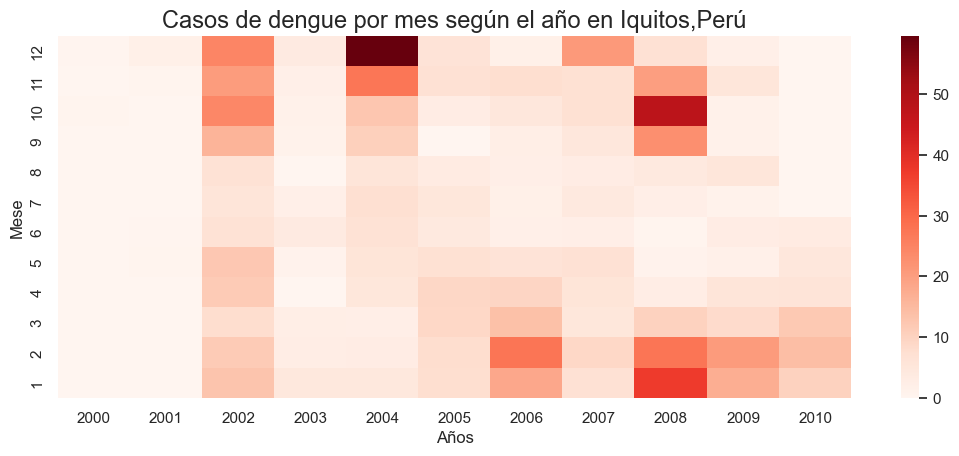

In [19]:
sns.set(rc={"figure.dpi":100,'figure.figsize':(12.8,4.8)})
ax = sns.heatmap(pivot_cases_iq,cmap=colormap)
ax.set_title("Casos de dengue por mes según el año en Iquitos,Perú",fontdict={'fontsize':17})
ax.set_xlabel("Años")
ax.set_ylabel("Mese")
fig = ax.get_figure()
fig.savefig("heat_map_peru.png")

La eleccion del color Rojo se debe a la bandera del país.

In [16]:
sj_pivot_table = sj.pivot_table(index='month',columns='year',values='total_cases',fill_value=0)
sj_pivot_table

year,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008
month,,,,,,,,,,,,,,,,,,,
1,0.00,27.80,83.00,31.20,30.00,83.80,18.60,27.60,57.40,62.80,18.40,19.20,30.80,9.80,16.00,11.20,13.60,11.80,12.60
2,0.00,19.75,47.25,20.75,33.00,24.25,18.75,22.25,60.25,39.25,6.75,13.00,18.50,6.25,12.00,10.25,7.00,15.25,5.25
3,0.00,17.75,41.25,14.25,25.00,13.50,9.50,13.50,38.25,22.75,4.00,13.50,7.50,9.25,7.25,6.00,3.00,14.00,2.50
4,4.00,17.40,27.00,7.80,17.00,8.60,7.60,11.80,30.80,14.40,2.00,7.00,4.00,4.40,5.00,3.60,2.60,6.20,3.00
5,4.50,13.50,24.50,13.75,22.50,4.00,4.25,6.75,43.25,13.25,1.00,8.50,3.75,7.00,6.75,3.75,6.50,13.00,0.00
6,5.25,18.00,23.50,16.25,33.50,10.25,4.50,10.25,70.75,11.25,2.75,14.25,2.00,11.75,12.25,17.25,5.50,24.50,0.00
7,7.80,18.60,30.40,18.60,55.00,12.80,9.20,7.20,170.40,17.80,3.40,16.00,3.80,18.20,12.40,45.40,8.40,37.00,0.00
8,21.25,66.00,43.50,19.25,90.00,19.25,18.25,17.25,254.00,33.50,4.50,35.25,5.50,27.25,13.75,102.50,15.00,78.75,0.00
9,27.75,78.25,67.40,24.50,238.75,33.00,23.40,38.50,103.50,46.25,6.40,56.25,5.25,31.50,15.40,115.50,22.00,97.50,0.00


In [17]:
sj_pivot_table.sort_values(by='month',axis=0,ascending=False,inplace=True)

Text(127.24999999999999, 0.5, 'Mese')

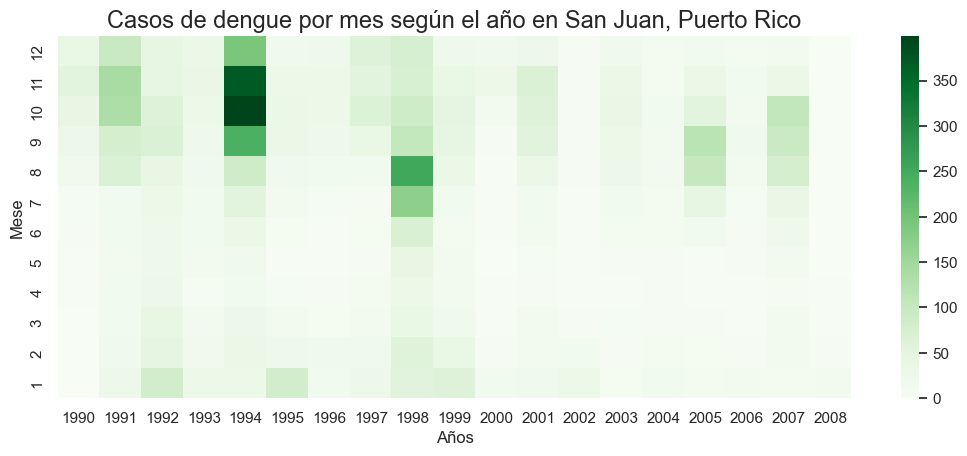

In [20]:
sns.set(rc={"figure.dpi":100,'figure.figsize':(12.8,4.8)})
colors = sns.color_palette("Greens", as_cmap=True)
ax = sns.heatmap(sj_pivot_table,cmap=colors)
ax.set_title("Casos de dengue por mes según el año en San Juan, Puerto Rico",fontdict={'fontsize':17})
ax.set_xlabel("Años")
ax.set_ylabel("Mese")
fig = ax.get_figure()
fig.savefig("heat_map_peru.png")